# Autocorrélation spatiale
Reproduction avec R l'essentiel d'une analyse menée avec Geoda.

-/-/- - Author: Abdoulaye DIALLO  
-/-/- - École: ENSAI  
-/-/- - Cours: Spatial Data  

#### Sources et Références
#### [Geospatial Data Analysis | SciPy 2018 | Serge Rey](https://www.youtube.com/watch?v=kJXUUO5M4ok)  
#### [--](--)
#### [--](--)  

----------------------------

La première loi de la géographie de **Waldo Tober**: `tout est lié à tout le reste, mais les choses proches sont plus liées que les choses lointaine`.

----------------------------

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## Les donnnées

#### chargement des données non spatial

In [4]:
# Chargeons les données non spatial à fusionée avec les données spati
medianhousing = gpd.read_file("medianhousing/medianhousing.shp")
print(medianhousing.crs)

epsg:3857


In [5]:
medianhousing.head(2)

,POLY_ID,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,SHAPE_AREA,SHAPE_LEN,Id,Id2,Geography,Median_val,Median_v_1,geometry
0,1,1400000US25017300100,25,017,300100,3001,Tract,1.153484e+08,48105.939998,1400000US25017300100,2.501730e+10,"Census Tract 3001, Middlesex County, Massachus...",286700.0,15865.0,"POLYGON ((-7989680.091 5267632.891, -7989885.5..."
1,2,1400000US25017301101,25,017,301101,3011.01,Tract,8.252731e+07,41749.428647,1400000US25017301101,2.501730e+10,"Census Tract 3011.01, Middlesex County, Massac...",290800.0,14919.0,"POLYGON ((-7989680.091 5267632.891, -7989536.8..."


In [7]:
type(medianhousing.geometry)

geopandas.geoseries.GeoSeries

#### Q: What is the most frequently occurring number of neighbors?

0    2
1    5
2    4
Name: NBR_NEIGHBORS, dtype: object



Text(0.5, 1.0, 'Nombre de voisin pour chaque région donnée')

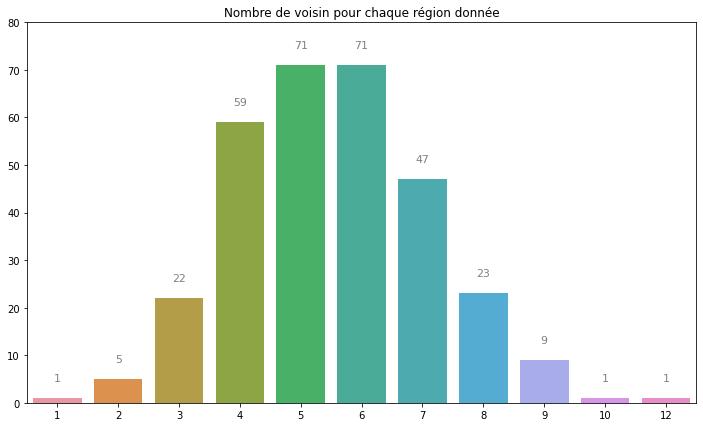

In [81]:
gdf = medianhousing.copy()
# add NEIGHBORS column
gdf["NEIGHBORS"] = None  
gdf["NBR_NEIGHBORS"] = None

for index, country in gdf.iterrows():   

    neighbors = gdf[~gdf.geometry.disjoint(country.geometry)].NAME.tolist() # Get des communes qui sont NON disjoints
    neighbors = [ name for name in neighbors if country.NAME != name ] # # remove own name of the country from the list
   
    gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)  # add names of neighbors as NEIGHBORS value
    gdf.at[index, "NBR_NEIGHBORS"] = len(neighbors)  # add len of neighbors as NEIGHBORS value
print(gdf.loc[:,"NBR_NEIGHBORS"].head(3))

print("")
plt.figure(figsize=(12,7))
ax = sns.barplot(x=gdf.NBR_NEIGHBORS.value_counts().index, y=gdf.NBR_NEIGHBORS.value_counts().values, )

#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
_ = ax.set_ylim(0,80)
ax.set_title("Nombre de voisin pour chaque région donnée")

**Reponse:** 5 et 6 ont plus de voisins

#### Q: What is the smallest number of neighbors? How many tracts have that number of neighbors?
**Réponse:** 1 est le plus petit nbre de voisin

<AxesSubplot:>

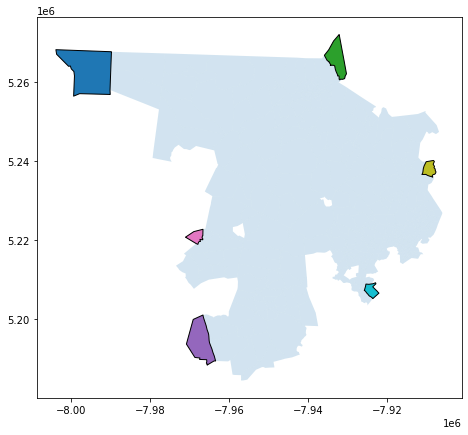

In [78]:
ax = gdf.plot(figsize=(13,7), alpha=0.2,)
gdf[gdf['NBR_NEIGHBORS']<=2].plot(figsize=(13,7), column="NAME", edgecolor="k", ax=ax)